Epoch  0  Loss:  0.5102183649012532
Epoch  1  Loss:  0.5095053810606417
Epoch  2  Loss:  0.508802247908433
Epoch  3  Loss:  0.5081087196753404
Epoch  4  Loss:  0.507424544498743
Epoch  5  Loss:  0.5067494653270755
Epoch  6  Loss:  0.5060832207877887
Epoch  7  Loss:  0.5054255460174547
Epoch  8  Loss:  0.5047761734528603
Epoch  9  Loss:  0.5041348335822164
Epoch  10  Loss:  0.5035012556558894
Epoch  11  Loss:  0.5028751683563354
Epoch  12  Loss:  0.5022563004271926
Epoch  13  Loss:  0.501644381261736
Epoch  14  Loss:  0.5010391414511478
Epoch  15  Loss:  0.5004403132932697
Epoch  16  Loss:  0.4998476312627164
Epoch  17  Loss:  0.49926083244340025
Epoch  18  Loss:  0.4986796569246761
Epoch  19  Loss:  0.49810384816245207
Epoch  20  Loss:  0.4975331533067138
Epoch  21  Loss:  0.4969673234970035
Epoch  22  Loss:  0.49640611412745067
Epoch  23  Loss:  0.49584928508300435
Epoch  24  Loss:  0.4952966009485287
Epoch  25  Loss:  0.49474783119243737
Epoch  26  Loss:  0.4942027503265309
Epoch  27

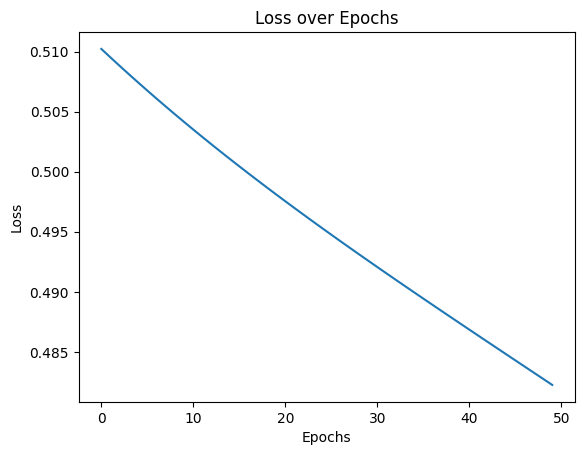

Input:  [[0 1 0 1]
 [1 0 1 0]
 [0 0 1 1]]
Output:  [[0.6421819  0.55032604 0.51567471 0.70050916]
 [0.61519503 0.5247575  0.5353613  0.67728362]
 [0.54288733 0.4646729  0.57691909 0.6083018 ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of sigmoid activation function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the autoencoder class
class Autoencoder:
    
    def __init__(self, input_size, hidden_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.input_size)
    
    def forward(self, X):
        self.z = np.dot(X, self.weights1)
        self.a = sigmoid(self.z)
        self.z2 = np.dot(self.a, self.weights2)
        self.a2 = sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, output):
        self.error = y - output
        self.delta2 = self.error * sigmoid_derivative(output)
        self.error_hidden = self.delta2.dot(self.weights2.T)
        self.delta1 = self.error_hidden * sigmoid_derivative(self.a)
        self.weights1 += self.learning_rate * X.T.dot(self.delta1)
        self.weights2 += self.learning_rate * self.a.T.dot(self.delta2)
    
    def train(self, X, y, epochs):
        self.loss = []
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = np.mean(np.abs(self.error))
            self.loss.append(loss)
            print("Epoch ", i, " Loss: ", loss)
        
    def predict(self, X):
        return self.forward(X)


# Sample binary input data
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 0],
              [0, 0, 1, 1]])

# Define the autoencoder object
autoencoder = Autoencoder(input_size=4, hidden_size=2, learning_rate=0.1)

# Train the autoencoder for 100 epochs
autoencoder.train(X, X, epochs=50)

# Plot the loss over epochs
plt.plot(autoencoder.loss)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Test the autoencoder by predicting the output for the same input
output = autoencoder.predict(X)
print("Input: ", X)
print("Output: ", output)

Iteration 1/1000: Loss = 0.1274
Iteration 101/1000: Loss = 0.0163
Iteration 201/1000: Loss = 0.0022
Iteration 301/1000: Loss = 0.0019
Iteration 401/1000: Loss = 0.0018
Iteration 501/1000: Loss = 0.0017
Iteration 601/1000: Loss = 0.0017
Iteration 701/1000: Loss = 0.0016
Iteration 801/1000: Loss = 0.0016
Iteration 901/1000: Loss = 0.0016


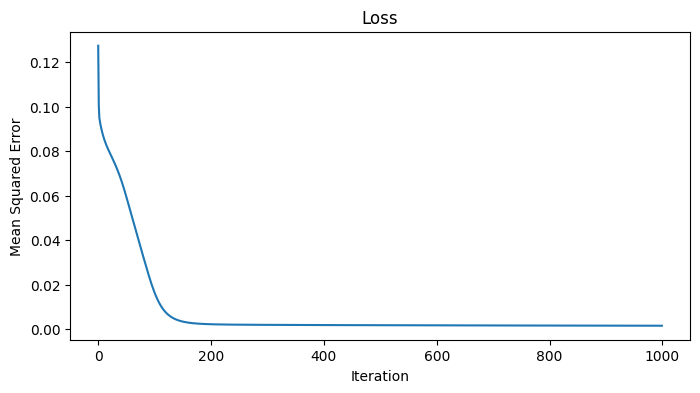

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
X = np.random.rand(100, 2)

# Autoencoder for real-valued inputs
class Autoencoder:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        # Initialize weights
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.b1 = np.zeros((1, self.hidden_dim))
        self.W2 = np.random.randn(self.hidden_dim, self.output_dim)
        self.b2 = np.zeros((1, self.output_dim))

    def forward(self, X):
        # Encode
        self.z = np.dot(X, self.W1) + self.b1
        self.a = self.sigmoid(self.z)

        # Decode
        self.z2 = np.dot(self.a, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_der(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def backward(self, X, Y, output):
        delta2 = (output - Y) * self.sigmoid_der(self.z2)
        dW2 = np.dot(self.a.T, delta2)
        db2 = np.sum(delta2, axis=0)
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_der(self.z)
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        return dW1, db1, dW2, db2

    def update_weights(self, dW1, db1, dW2, db2, eta):
        self.W1 -= eta * dW1
        self.b1 -= eta * db1
        self.W2 -= eta * dW2
        self.b2 -= eta * db2

    def train(self, X, epochs, eta):
        loss = []
        for i in range(epochs):
            output = self.forward(X)
            dW1, db1, dW2, db2 = self.backward(X, X, output)
            self.update_weights(dW1, db1, dW2, db2, eta)
            loss.append(np.mean((output - X)**2))
            if i % 100 == 0:
                print('Iteration {}/{}: Loss = {:.4f}'.format(i+1, epochs, loss[-1]))
        return loss

# Train the autoencoder
input_dim = 2
hidden_dim = 2
output_dim = 2
epochs = 1000
eta = 0.1

ae = Autoencoder(input_dim, hidden_dim, output_dim)
loss = ae.train(X, epochs, eta)

# Plot the loss
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
axs.plot(loss)
axs.set_title('Loss')
axs.set_xlabel('Iteration')
axs.set_ylabel('Mean Squared Error')
plt.show()

# Plot the original and reconstructed data
# X_reconstructed = ae.forward(X)
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
# axs[0].scatter(X[:, 0], X[:, 1], s=50)